# Tutorial 2 - RNN Time Series

In this notebook, we will predict the stock price of Netflix by comparing the 100 days stock price. 

In [9]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error


# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Read the Dataset

In [10]:
import pandas as pd

Netflix = pd.read_csv('NFLX.csv')

Netflix.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,11/25/2022,289.000000,289.209991,284.170013,285.540009,285.540009,3236000
1,11/28/2022,284.000000,289.549988,280.529999,281.170013,281.170013,4703400
2,11/29/2022,282.500000,282.959991,275.940002,280.959991,280.959991,5786900
3,11/30/2022,281.369995,308.260010,280.410004,305.529999,305.529999,16070100
4,12/1/2022,303.989990,319.799988,303.029999,316.950012,316.950012,14664900


In [11]:
Netflix

,Date,Open,High,Low,Close,Adj Close,Volume
0,11/25/2022,289.000000,289.209991,284.170013,285.540009,285.540009,3236000
1,11/28/2022,284.000000,289.549988,280.529999,281.170013,281.170013,4703400
2,11/29/2022,282.500000,282.959991,275.940002,280.959991,280.959991,5786900
3,11/30/2022,281.369995,308.260010,280.410004,305.529999,305.529999,16070100
4,12/1/2022,303.989990,319.799988,303.029999,316.950012,316.950012,14664900
...,...,...,...,...,...,...,...
95,4/14/2023,342.940002,344.850006,336.410004,338.630005,338.630005,5345600
96,4/17/2023,338.000000,338.390015,327.500000,332.720001,332.720001,6136000
97,4/18/2023,335.000000,337.190002,330.500000,333.700012,333.700012,17944500
98,4/19/2023,324.209991,325.750000,316.100006,323.119995,323.119995,22128300


In [12]:
#Drop the columns we don't need

Netflix = Netflix.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)

In [13]:
Netflix

,Date,Close
0,11/25/2022,285.540009
1,11/28/2022,281.170013
2,11/29/2022,280.959991
3,11/30/2022,305.529999
4,12/1/2022,316.950012
...,...,...
95,4/14/2023,338.630005
96,4/17/2023,332.720001
97,4/18/2023,333.700012
98,4/19/2023,323.119995


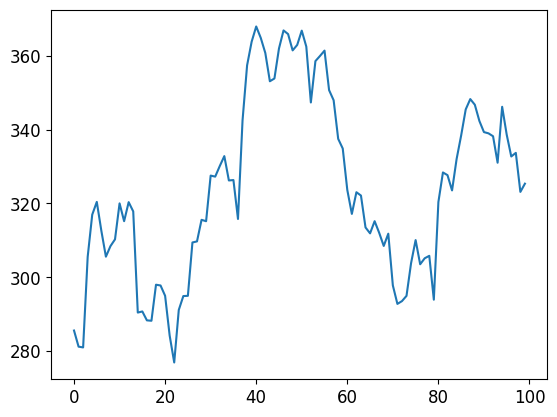

In [14]:
#Plot temp

plt.plot(Netflix['Close'])
plt.show()

# Data Cleanup

In [15]:
# Remove all null values

Netflix = Netflix.dropna().reset_index(drop=True)

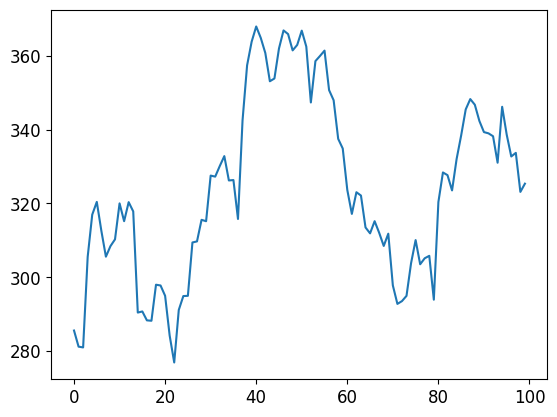

In [16]:
plt.plot(Netflix['Close'])
plt.show()

## RESHAPE the data set!

In [17]:
Netflix.shape

(100, 2)

In [18]:
Netflix.shape[0]/10

10.0

In [19]:
Netflix.groupby(['Date']).count()

,Close
Date,
1/10/2023,1
1/11/2023,1
1/12/2023,1
1/13/2023,1
1/17/2023,1
...,...
4/20/2023,1
4/3/2023,1
4/4/2023,1


In [20]:
# Re-organize the data set by day and hours

stock = np.array(Netflix['Close']).reshape(10,10)

stock

array([[285.540009, 281.170013, 280.959991, 305.529999, 316.950012,
        320.410004, 312.589996, 305.559998, 308.420013, 310.26001 ],
       [320.01001 , 315.179993, 320.339996, 317.829987, 290.410004,
        290.709991, 288.299988, 288.190002, 297.959991, 297.75    ],
       [294.959991, 284.170013, 276.880005, 291.119995, 294.880005,
        294.950012, 309.410004, 309.700012, 315.549988, 315.170013],
       [327.540009, 327.26001 , 330.130005, 332.820007, 326.220001,
        326.329987, 315.779999, 342.5     , 357.420013, 363.829987],
       [367.959991, 364.869995, 360.769989, 353.109985, 353.859985,
        361.98999 , 366.890015, 365.899994, 361.480011, 362.950012],
       [366.829987, 362.5     , 347.359985, 358.570007, 359.959991,
        361.420013, 350.709991, 347.959991, 337.5     , 334.880005],
       [323.649994, 317.149994, 323.029999, 322.130005, 313.480011,
        311.880005, 315.179993, 312.029999, 308.470001, 311.790009],
       [297.779999, 292.76001 , 293.51001

In [21]:
# Convert to dataframe

stock_df = pd.DataFrame(stock, columns=np.arange(0,10,1))

stock_df

,0,1,2,3,4,5,6,7,8,9
0,285.540009,281.170013,280.959991,305.529999,316.950012,320.410004,312.589996,305.559998,308.420013,310.260010
1,320.010010,315.179993,320.339996,317.829987,290.410004,290.709991,288.299988,288.190002,297.959991,297.750000
2,294.959991,284.170013,276.880005,291.119995,294.880005,294.950012,309.410004,309.700012,315.549988,315.170013
3,327.540009,327.260010,330.130005,332.820007,326.220001,326.329987,315.779999,342.500000,357.420013,363.829987
4,367.959991,364.869995,360.769989,353.109985,353.859985,361.989990,366.890015,365.899994,361.480011,362.950012
5,366.829987,362.500000,347.359985,358.570007,359.959991,361.420013,350.709991,347.959991,337.500000,334.880005
6,323.649994,317.149994,323.029999,322.130005,313.480011,311.880005,315.179993,312.029999,308.470001,311.790009
7,297.779999,292.760010,293.510010,294.940002,303.790009,310.059998,303.500000,305.130005,305.790009,293.899994
8,320.369995,328.390015,327.660004,323.519989,332.029999,338.429993,345.480011,348.279999,346.750000,342.350006
9,339.329987,338.989990,338.209991,331.029999,346.190002,338.630005,332.720001,333.700012,323.119995,325.350006


# Reshape for Standardizing Data

In [22]:
# Let's create a single sequence (i.e., feature) for standardization

stock_1feature = np.array(stock_df).ravel().reshape(-1,1)

stock_1feature.shape

(100, 1)

In [23]:
stock_1feature

array([[285.540009],
       [281.170013],
       [280.959991],
       [305.529999],
       [316.950012],
       [320.410004],
       [312.589996],
       [305.559998],
       [308.420013],
       [310.26001 ],
       [320.01001 ],
       [315.179993],
       [320.339996],
       [317.829987],
       [290.410004],
       [290.709991],
       [288.299988],
       [288.190002],
       [297.959991],
       [297.75    ],
       [294.959991],
       [284.170013],
       [276.880005],
       [291.119995],
       [294.880005],
       [294.950012],
       [309.410004],
       [309.700012],
       [315.549988],
       [315.170013],
       [327.540009],
       [327.26001 ],
       [330.130005],
       [332.820007],
       [326.220001],
       [326.329987],
       [315.779999],
       [342.5     ],
       [357.420013],
       [363.829987],
       [367.959991],
       [364.869995],
       [360.769989],
       [353.109985],
       [353.859985],
       [361.98999 ],
       [366.890015],
       [365.8

## Standardize the values

In [24]:
# Next, standardize

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

stock_std = scaler.fit_transform(stock_1feature)

In [25]:
stock_reshaped = stock_std.reshape(10,10)

stock_reshaped.shape

(10, 10)

In [26]:
#Pandas version of the reshaped data

pd.DataFrame(stock_reshaped)

,0,1,2,3,4,5,6,7,8,9
0,-1.585356,-1.765555,-1.774216,-0.761059,-0.290149,-0.147475,-0.469936,-0.759822,-0.641888,-0.566015
1,-0.163968,-0.363137,-0.150361,-0.253863,-1.384540,-1.372170,-1.471547,-1.476083,-1.073212,-1.081871
2,-1.196919,-1.641849,-1.942456,-1.355263,-1.200217,-1.197330,-0.601065,-0.589106,-0.347880,-0.363548
3,0.146535,0.134989,0.253335,0.364258,0.092104,0.096639,-0.338395,0.763418,1.378652,1.642970
4,1.813273,1.685856,1.516790,1.200926,1.231852,1.567097,1.769152,1.728328,1.546068,1.606684
5,1.766677,1.588128,0.963822,1.426072,1.483389,1.543594,1.101961,0.988563,0.557240,0.449203
6,-0.013872,-0.281903,-0.039438,-0.076549,-0.433236,-0.499213,-0.363137,-0.493028,-0.639827,-0.502924
7,-1.080634,-1.287636,-1.256709,-1.197743,-0.832808,-0.574262,-0.844767,-0.777553,-0.750337,-1.240628
8,-0.149124,0.181585,0.151483,-0.019233,0.331682,0.595589,0.886300,1.001759,0.938669,0.757233
9,0.632701,0.618681,0.586517,0.290446,0.915577,0.603836,0.360134,0.400546,-0.035727,0.056229


# Split the Data

**In certain cases, we cannot use a random split. For example, if we are trying to predict the stock market, we cannot use a random split. We need to use a chronological split.**

BUT, keep in mind if we have something like hourly readings of dayly temperature, we can use a random split on days, but the sequence of the temperature within the day is important to remain sequential.

In this case, we are using a random spli because each day as an independent sample.

In [46]:
from sklearn.model_selection import train_test_split

#train, test = train_test_split(stock_reshaped, test_size=0.3)

# if we neede to maintain the ordering of the data, we can use the following code to split the data
split_point = int(len(stock_reshaped)*0.7)

train, test = stock_reshaped[:split_point], stock_reshaped[split_point:]

In [47]:
train.shape

(7, 10)

In [48]:
train

array([[-1.58535635, -1.76555534, -1.77421571, -0.76105903, -0.29014903,
        -0.14747451, -0.46993649, -0.759822  , -0.64188784, -0.56601464],
       [-0.16396847, -0.36313666, -0.15036133, -0.25386282, -1.38453965,
        -1.37216954, -1.47154723, -1.47608256, -1.07321213, -1.08187121],
       [-1.19691864, -1.64184883, -1.94245599, -1.35526282, -1.20021691,
        -1.19733013, -0.60106506, -0.58910644, -0.34787972, -0.36354819],
       [ 0.14653484,  0.13498894,  0.25333463,  0.36425822,  0.09210365,
         0.09663897, -0.33839511,  0.76341762,  1.37865189,  1.6429704 ],
       [ 1.8132732 ,  1.68585565,  1.51678984,  1.20092571,  1.23185234,
         1.56709719,  1.7691522 ,  1.72832818,  1.54606795,  1.60668419],
       [ 1.76667691,  1.58812771,  0.96382155,  1.42607247,  1.48338916,
         1.54359391,  1.10196074,  0.98856311,  0.5572401 ,  0.44920328],
       [-0.01387189, -0.28190267, -0.0394377 , -0.0765494 , -0.43323627,
        -0.49921333, -0.36313666, -0.49302825

In [49]:
test.shape

(3, 10)

In [50]:
test

array([[-1.08063419, -1.28763597, -1.25670934, -1.1977429 , -0.83280839,
        -0.57426223, -0.84476706, -0.77755298, -0.75033738, -1.24062815],
       [-0.1491243 ,  0.18158527,  0.1514829 , -0.01923271,  0.33168185,
         0.59558883,  0.88629988,  1.0017588 ,  0.93866852,  0.75723254],
       [ 0.63270053,  0.61868059,  0.58651693,  0.29044634,  0.91557672,
         0.60383642,  0.36013443,  0.40054567, -0.03572667,  0.05622896]])

# Create Input and Target values

In [51]:
train_inputs = train[:,:9]


pd.DataFrame(train_inputs)

,0,1,2,3,4,5,6,7,8
0,-1.585356,-1.765555,-1.774216,-0.761059,-0.290149,-0.147475,-0.469936,-0.759822,-0.641888
1,-0.163968,-0.363137,-0.150361,-0.253863,-1.384540,-1.372170,-1.471547,-1.476083,-1.073212
2,-1.196919,-1.641849,-1.942456,-1.355263,-1.200217,-1.197330,-0.601065,-0.589106,-0.347880
3,0.146535,0.134989,0.253335,0.364258,0.092104,0.096639,-0.338395,0.763418,1.378652
4,1.813273,1.685856,1.516790,1.200926,1.231852,1.567097,1.769152,1.728328,1.546068
5,1.766677,1.588128,0.963822,1.426072,1.483389,1.543594,1.101961,0.988563,0.557240
6,-0.013872,-0.281903,-0.039438,-0.076549,-0.433236,-0.499213,-0.363137,-0.493028,-0.639827


## Add one more dimension to make it ready for RNNs

See here for more details: https://keras.io/layers/recurrent/, and https://shiva-verma.medium.com/understanding-input-and-output-shape-in-lstm-keras-c501ee95c65e


In [52]:
train_inputs

array([[-1.58535635, -1.76555534, -1.77421571, -0.76105903, -0.29014903,
        -0.14747451, -0.46993649, -0.759822  , -0.64188784],
       [-0.16396847, -0.36313666, -0.15036133, -0.25386282, -1.38453965,
        -1.37216954, -1.47154723, -1.47608256, -1.07321213],
       [-1.19691864, -1.64184883, -1.94245599, -1.35526282, -1.20021691,
        -1.19733013, -0.60106506, -0.58910644, -0.34787972],
       [ 0.14653484,  0.13498894,  0.25333463,  0.36425822,  0.09210365,
         0.09663897, -0.33839511,  0.76341762,  1.37865189],
       [ 1.8132732 ,  1.68585565,  1.51678984,  1.20092571,  1.23185234,
         1.56709719,  1.7691522 ,  1.72832818,  1.54606795],
       [ 1.76667691,  1.58812771,  0.96382155,  1.42607247,  1.48338916,
         1.54359391,  1.10196074,  0.98856311,  0.5572401 ],
       [-0.01387189, -0.28190267, -0.0394377 , -0.0765494 , -0.43323627,
        -0.49921333, -0.36313666, -0.49302825, -0.63982656]])

In [53]:
train_inputs.shape 

(7, 9)

In [54]:
#Create an additional dimension for train

train_x = train_inputs[:,:,np.newaxis]

train_x.shape 

(7, 9, 1)

In [55]:
train_x

array([[[-1.58535635],
        [-1.76555534],
        [-1.77421571],
        [-0.76105903],
        [-0.29014903],
        [-0.14747451],
        [-0.46993649],
        [-0.759822  ],
        [-0.64188784]],

       [[-0.16396847],
        [-0.36313666],
        [-0.15036133],
        [-0.25386282],
        [-1.38453965],
        [-1.37216954],
        [-1.47154723],
        [-1.47608256],
        [-1.07321213]],

       [[-1.19691864],
        [-1.64184883],
        [-1.94245599],
        [-1.35526282],
        [-1.20021691],
        [-1.19733013],
        [-0.60106506],
        [-0.58910644],
        [-0.34787972]],

       [[ 0.14653484],
        [ 0.13498894],
        [ 0.25333463],
        [ 0.36425822],
        [ 0.09210365],
        [ 0.09663897],
        [-0.33839511],
        [ 0.76341762],
        [ 1.37865189]],

       [[ 1.8132732 ],
        [ 1.68585565],
        [ 1.51678984],
        [ 1.20092571],
        [ 1.23185234],
        [ 1.56709719],
        [ 1.7691522 ],
   

## Set the target

In [56]:
# The last column (23) is TARGET

train_target = train[:,-1]


pd.DataFrame(train_target, columns=['9'])

,9
0,-0.566015
1,-1.081871
2,-0.363548
3,1.642970
4,1.606684
5,0.449203
6,-0.502924


## Repeat for TEST

In [57]:
test.shape

(3, 10)

In [58]:
test

array([[-1.08063419, -1.28763597, -1.25670934, -1.1977429 , -0.83280839,
        -0.57426223, -0.84476706, -0.77755298, -0.75033738, -1.24062815],
       [-0.1491243 ,  0.18158527,  0.1514829 , -0.01923271,  0.33168185,
         0.59558883,  0.88629988,  1.0017588 ,  0.93866852,  0.75723254],
       [ 0.63270053,  0.61868059,  0.58651693,  0.29044634,  0.91557672,
         0.60383642,  0.36013443,  0.40054567, -0.03572667,  0.05622896]])

In [59]:
test_inputs = test[:, :9]

In [60]:
test_inputs

array([[-1.08063419, -1.28763597, -1.25670934, -1.1977429 , -0.83280839,
        -0.57426223, -0.84476706, -0.77755298, -0.75033738],
       [-0.1491243 ,  0.18158527,  0.1514829 , -0.01923271,  0.33168185,
         0.59558883,  0.88629988,  1.0017588 ,  0.93866852],
       [ 0.63270053,  0.61868059,  0.58651693,  0.29044634,  0.91557672,
         0.60383642,  0.36013443,  0.40054567, -0.03572667]])

In [61]:
#Create an additional dimension for test

test_x = test_inputs[:,:,np.newaxis]

test_x.shape 

(3, 9, 1)

In [62]:
test_target = test[:,-1]


pd.DataFrame(test_target, columns=['9'])

,9
0,-1.240628
1,0.757233
2,0.056229


In [63]:
performance = pd.DataFrame({"model":[], "MSE":[]})

# A normal (cross-sectional) NN

This model assumes that the data is NOT a time-series data set. It treats the data as cross-sectional and the columns being independent of each other.

In [64]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[9, 1]),
    keras.layers.Dense(23, activation='relu'),
    keras.layers.Dense(1, activation=None)
    
])

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 444ms/step - loss: 1.3491
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 1.2736
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 1.2015
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 1.1325
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 1.0656
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 1.0011
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 0.9404
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 0.8825
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 0.8256
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 0.7722
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 0.7227
Epoch 12/100
1/1 [==============================] - 0s 4ms/step - loss: 0.6774
Epoch 13/100
1/1 [==============================] - 0s 4ms/

### Predictions

In [65]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 3s 3s/step


In [66]:
# Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [67]:
comparison

,actual,predicted
0,293.899994,311.316528
1,342.350006,345.464386
2,325.350006,329.677582


In [68]:
cs_nn = mean_squared_error(comparison['actual'], comparison['predicted'])

In [69]:
performance = pd.concat([performance, pd.DataFrame({'model':"Cross NN", 'MSE': cs_nn}, index =[0])])
performance

,model,MSE
0,Cross NN,110.587648


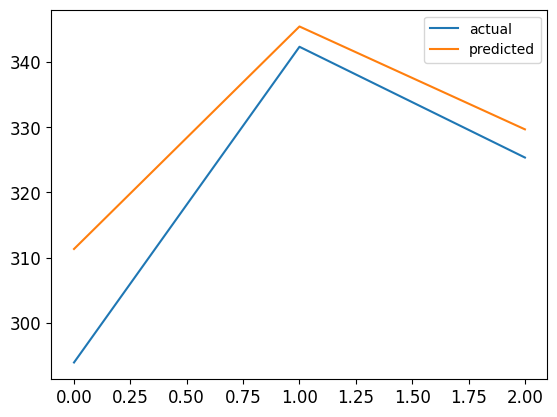

In [70]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# Simple RNN

Simplest recurrent neural network

In [71]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(32, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [72]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 1s 1s/step - loss: 0.9406
Epoch 2/30
1/1 [==============================] - 0s 5ms/step - loss: 0.8658
Epoch 3/30
1/1 [==============================] - 0s 5ms/step - loss: 0.7985
Epoch 4/30
1/1 [==============================] - 0s 9ms/step - loss: 0.7457
Epoch 5/30
1/1 [==============================] - 0s 6ms/step - loss: 0.7021
Epoch 6/30
1/1 [==============================] - 0s 6ms/step - loss: 0.6613
Epoch 7/30
1/1 [==============================] - 0s 8ms/step - loss: 0.6244
Epoch 8/30
1/1 [==============================] - 0s 7ms/step - loss: 0.5900
Epoch 9/30
1/1 [==============================] - 0s 6ms/step - loss: 0.5580
Epoch 10/30
1/1 [==============================] - 0s 6ms/step - loss: 0.5279
Epoch 11/30
1/1 [==============================] - 0s 8ms/step - loss: 0.4995
Epoch 12/30
1/1 [==============================] - 0s 6ms/step - loss: 0.4726
Epoch 13/30
1/1 [==============================] - 0s 6ms/step - loss: 0.4

### Predictions

In [73]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 233ms/step


In [74]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [75]:
comparison

,actual,predicted
0,293.899994,319.016876
1,342.350006,345.069214
2,325.350006,328.245972


In [76]:
s_rnn = mean_squared_error(comparison['actual'], comparison['predicted'])

In [77]:
performance = pd.concat([performance, pd.DataFrame({'model':"Simple RNN", 'MSE' : s_rnn}, index =[0])])
performance

,model,MSE
0,Cross NN,110.587648
0,Simple RNN,215.546160


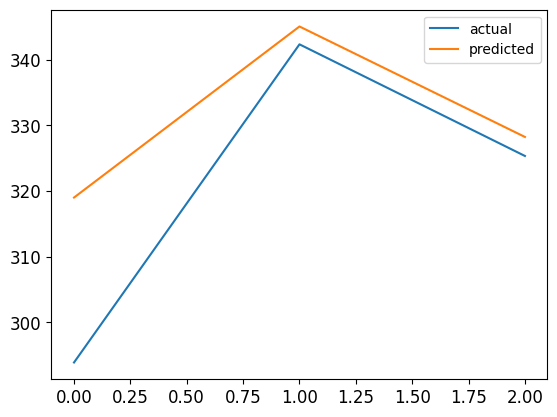

In [78]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

## Simple RNN with more layers

**Be careful: when stacking RNN layers, you have to set "return_sequences" to True. This enables the layer to send a "sequence" of values to the next layer -- jut like how it uses a sequence of values for training. However, if the output of RNN is sent to a DENSE layer, then a single value should be sent. That's why there is no "return sequences" right before DENSE layers.**

In [79]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.SimpleRNN(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [80]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 3s 3s/step - loss: 0.7817
Epoch 2/30
1/1 [==============================] - 0s 13ms/step - loss: 0.6874
Epoch 3/30
1/1 [==============================] - 0s 8ms/step - loss: 0.5971
Epoch 4/30
1/1 [==============================] - 0s 11ms/step - loss: 0.5096
Epoch 5/30
1/1 [==============================] - 0s 17ms/step - loss: 0.4315
Epoch 6/30
1/1 [==============================] - 0s 16ms/step - loss: 0.3584
Epoch 7/30
1/1 [==============================] - 0s 10ms/step - loss: 0.2908
Epoch 8/30
1/1 [==============================] - 0s 13ms/step - loss: 0.2393
Epoch 9/30
1/1 [==============================] - 0s 20ms/step - loss: 0.2031
Epoch 10/30
1/1 [==============================] - 0s 24ms/step - loss: 0.1804
Epoch 11/30
1/1 [==============================] - 0s 16ms/step - loss: 0.1672
Epoch 12/30
1/1 [==============================] - 0s 19ms/step - loss: 0.1576
Epoch 13/30
1/1 [==============================] - 0s 14ms/step 

### Predictions

In [81]:
#Predict:
y_pred = model.predict(test_x)


1/1 [==============================] - 1s 506ms/step


In [82]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [83]:
comparison

,actual,predicted
0,293.899994,305.499908
1,342.350006,345.147491
2,325.350006,326.310333


In [84]:
sml_rnn = mean_squared_error(comparison['actual'], comparison['predicted'])

In [85]:
performance = pd.concat([performance, pd.DataFrame({'model':"Simple RNN more layers", 'MSE' : sml_rnn}, index =[0])])
performance

,model,MSE
0,Cross NN,110.587648
0,Simple RNN,215.546160
0,Simple RNN more layers,47.768723


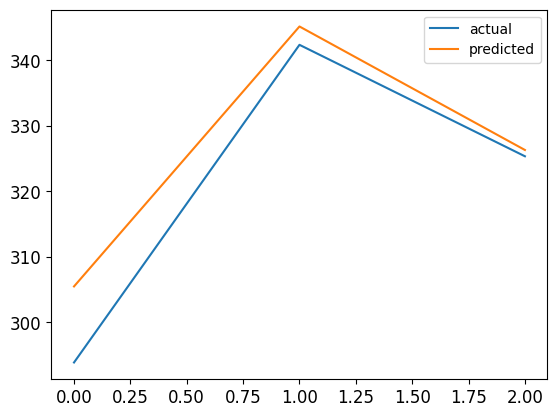

In [86]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# LSTM with one layer

In [87]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [88]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 1.3864
Epoch 2/30
1/1 [==============================] - 0s 7ms/step - loss: 1.3514
Epoch 3/30
1/1 [==============================] - 0s 6ms/step - loss: 1.3172
Epoch 4/30
1/1 [==============================] - 0s 6ms/step - loss: 1.2842
Epoch 5/30
1/1 [==============================] - 0s 7ms/step - loss: 1.2521
Epoch 6/30
1/1 [==============================] - 0s 9ms/step - loss: 1.2208
Epoch 7/30
1/1 [==============================] - 0s 9ms/step - loss: 1.1903
Epoch 8/30
1/1 [==============================] - 0s 9ms/step - loss: 1.1607
Epoch 9/30
1/1 [==============================] - 0s 10ms/step - loss: 1.1319
Epoch 10/30
1/1 [==============================] - 0s 12ms/step - loss: 1.1038
Epoch 11/30
1/1 [==============================] - 0s 12ms/step - loss: 1.0765
Epoch 12/30
1/1 [==============================] - 0s 11ms/step - loss: 1.0499
Epoch 13/30
1/1 [==============================] - 0s 11ms/step - loss

### Predictions

In [89]:
#Predict:
y_pred = model.predict(test_x)


1/1 [==============================] - 0s 244ms/step


In [90]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [91]:
lstm_1 = mean_squared_error(comparison['actual'], comparison['predicted'])

In [92]:
performance = pd.concat([performance, pd.DataFrame({'model':"LSTM", 'MSE' : lstm_1}, index =[0])])
performance

,model,MSE
0,Cross NN,110.587648
0,Simple RNN,215.546160
0,Simple RNN more layers,47.768723
0,LSTM,296.970479


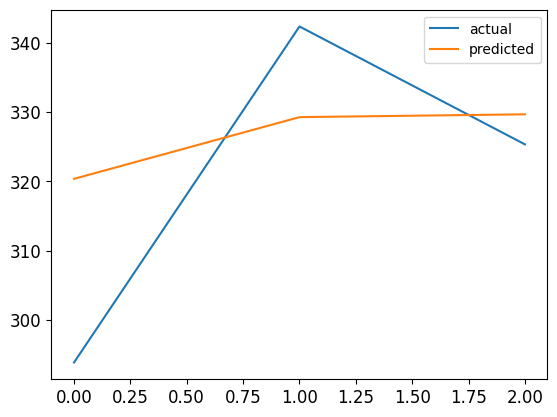

In [93]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# LSTM with more layers

In [94]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='tanh', return_sequences=True, input_shape=[9, 1]),
    keras.layers.LSTM(32, activation='tanh', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [95]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 7s 7s/step - loss: 0.9325
Epoch 2/30
1/1 [==============================] - 0s 10ms/step - loss: 0.8934
Epoch 3/30
1/1 [==============================] - 0s 13ms/step - loss: 0.8547
Epoch 4/30
1/1 [==============================] - 0s 11ms/step - loss: 0.8164
Epoch 5/30
1/1 [==============================] - 0s 12ms/step - loss: 0.7787
Epoch 6/30
1/1 [==============================] - 0s 17ms/step - loss: 0.7414
Epoch 7/30
1/1 [==============================] - 0s 14ms/step - loss: 0.7047
Epoch 8/30
1/1 [==============================] - 0s 19ms/step - loss: 0.6687
Epoch 9/30
1/1 [==============================] - 0s 18ms/step - loss: 0.6335
Epoch 10/30
1/1 [==============================] - 0s 16ms/step - loss: 0.5996
Epoch 11/30
1/1 [==============================] - 0s 16ms/step - loss: 0.5673
Epoch 12/30
1/1 [==============================] - 0s 17ms/step - loss: 0.5373
Epoch 13/30
1/1 [==============================] - 0s 12ms/step

### Predictions

In [96]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 2s 2s/step


In [97]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [98]:
lstm = mean_squared_error(comparison['actual'], comparison['predicted'])

In [99]:
performance = pd.concat([performance, pd.DataFrame({'model':"lstm more layers", 'MSE' : lstm}, index =[0])])
performance

,model,MSE
0,Cross NN,110.587648
0,Simple RNN,215.546160
0,Simple RNN more layers,47.768723
0,LSTM,296.970479
0,lstm more layers,144.567168


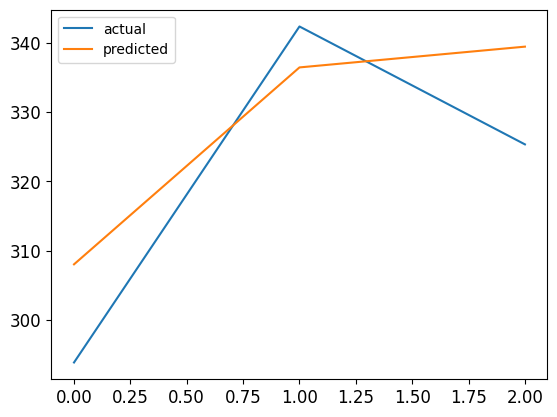

In [100]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# GRU (with more layers)

In [101]:
model = keras.models.Sequential([
    keras.layers.GRU(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [102]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='RMSprop')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 5s 5s/step - loss: 1.1793
Epoch 2/30
1/1 [==============================] - 0s 10ms/step - loss: 1.0901
Epoch 3/30
1/1 [==============================] - 0s 10ms/step - loss: 1.0328
Epoch 4/30
1/1 [==============================] - 0s 12ms/step - loss: 0.9900
Epoch 5/30
1/1 [==============================] - 0s 11ms/step - loss: 0.9533
Epoch 6/30
1/1 [==============================] - 0s 12ms/step - loss: 0.9233
Epoch 7/30
1/1 [==============================] - 0s 11ms/step - loss: 0.8955
Epoch 8/30
1/1 [==============================] - 0s 11ms/step - loss: 0.8648
Epoch 9/30
1/1 [==============================] - 0s 11ms/step - loss: 0.8272
Epoch 10/30
1/1 [==============================] - 0s 11ms/step - loss: 0.7873
Epoch 11/30
1/1 [==============================] - 0s 11ms/step - loss: 0.7505
Epoch 12/30
1/1 [==============================] - 0s 11ms/step - loss: 0.7151
Epoch 13/30
1/1 [==============================] - 0s 11ms/step

### Predictions

In [103]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 1s 781ms/step


In [104]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [105]:
gru_more = mean_squared_error(comparison['actual'], comparison['predicted'])

In [106]:
performance = pd.concat([performance, pd.DataFrame({'model':"GRU more layers", 'MSE' : gru_more}, index =[0])])
performance

,model,MSE
0,Cross NN,110.587648
0,Simple RNN,215.546160
0,Simple RNN more layers,47.768723
0,LSTM,296.970479
0,lstm more layers,144.567168
0,GRU more layers,201.620799


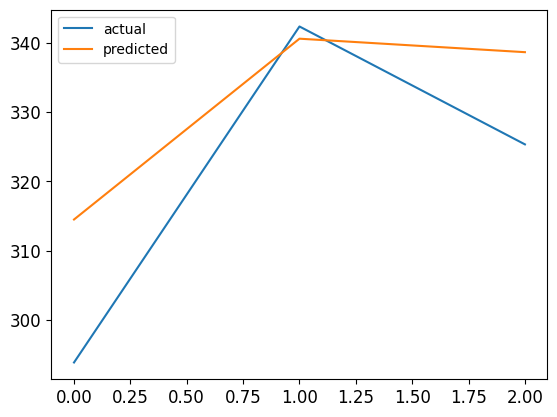

In [107]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

# Conv1D

### Last Layer: GRU (you can change it to SimpleRNN or LSTM as well)

In [108]:
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=3, strides=1, padding="valid", input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=True),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [109]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 6s 6s/step - loss: 1.1769
Epoch 2/30
1/1 [==============================] - 0s 107ms/step - loss: 1.1198
Epoch 3/30
1/1 [==============================] - 0s 114ms/step - loss: 1.0665
Epoch 4/30
1/1 [==============================] - 0s 82ms/step - loss: 1.0159
Epoch 5/30
1/1 [==============================] - 0s 80ms/step - loss: 0.9669
Epoch 6/30
1/1 [==============================] - 0s 86ms/step - loss: 0.9215
Epoch 7/30
1/1 [==============================] - 0s 115ms/step - loss: 0.8807
Epoch 8/30
1/1 [==============================] - 0s 85ms/step - loss: 0.8423
Epoch 9/30
1/1 [==============================] - 0s 54ms/step - loss: 0.8067
Epoch 10/30
1/1 [==============================] - 0s 141ms/step - loss: 0.7726
Epoch 11/30
1/1 [==============================] - 0s 80ms/step - loss: 0.7391
Epoch 12/30
1/1 [==============================] - 0s 77ms/step - loss: 0.7061
Epoch 13/30
1/1 [==============================] - 0s 111ms

### Predictions

In [110]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 445ms/step


In [111]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [112]:
conv1d = mean_squared_error(comparison['actual'], comparison['predicted'])

In [113]:
performance = pd.concat([performance, pd.DataFrame({'model':"conv1D", 'MSE' : conv1d}, index =[0])])
performance

,model,MSE
0,Cross NN,110.587648
0,Simple RNN,215.546160
0,Simple RNN more layers,47.768723
0,LSTM,296.970479
0,lstm more layers,144.567168
0,GRU more layers,201.620799
0,conv1D,128.028986


In [114]:
performance.sort_values(by='MSE')

,model,MSE
0,Simple RNN more layers,47.768723
0,Cross NN,110.587648
0,conv1D,128.028986
0,lstm more layers,144.567168
0,GRU more layers,201.620799
0,Simple RNN,215.546160
0,LSTM,296.970479


# Analysis

The values shown in the table here represent the mean squared errors obtained by several neural network models on a specific dataset. The accuracy of the model performs better when the MSE value is lower.

When we look at the values of the table, we can observe that the Simple RNN with more layers has the lowest MSE value of 47.768723, indicating that it performs the best on this dataset among the models tested and the next best model is the Cross NN, which has an MSE of 110.587648.

The conv1D model has an MSE of 128.028986, which is higher than the previous two models. The LSTM model with more layers has an MSE of 144.567168, followed by the GRU with more layers which has an MSE of 201.620799.

Finally, the Simple RNN and LSTM models have higher MSE values of 215.546160 and 296.970479. This indicates that they have a relatively poor performance compared to the other models.

When we compare all these MSE values we can conclude that Simple RNN with more layers is the best performed model amongst all the other models with low MSE values.